In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Asteroid_Impacts.csv')
data.head(10)

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0
5,2010 XB73,2017,2110,55,2.800000e-07,5.98,22.5,0.110,-5.03,-5.51,0
6,2005 TM173,2017,2111,123,9.000000e-07,8.79,24.1,0.052,-5.41,-6.42,0
7,2006 SF281,2017,2111,514,1.900000e-06,4.49,26.2,0.020,-5.91,-7.58,0
8,2010 VP139,2017,2112,350,1.800000e-05,2.04,28.5,0.007,-6.51,-7.54,0
9,2014 HR197,2017,2112,187,7.900000e-08,17.02,26.9,0.014,-7.18,-7.97,0


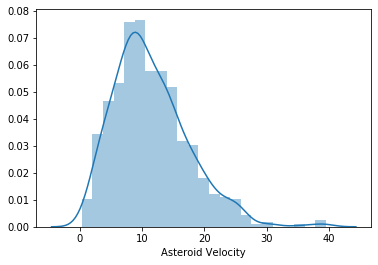

In [3]:
plt.figure()
sns.distplot(data['Asteroid Velocity'])
plt.show()

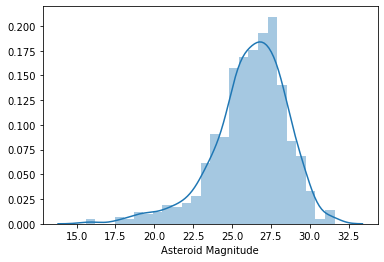

In [4]:
plt.figure()
sns.distplot(data['Asteroid Magnitude'])
plt.show()

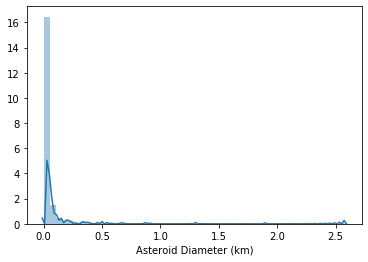

In [5]:
plt.figure()
sns.distplot(data['Asteroid Diameter (km)'])
plt.show()

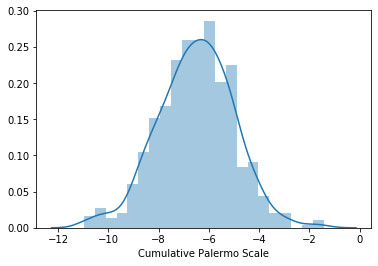

In [6]:
plt.figure()
sns.distplot(data['Cumulative Palermo Scale'])
plt.show()

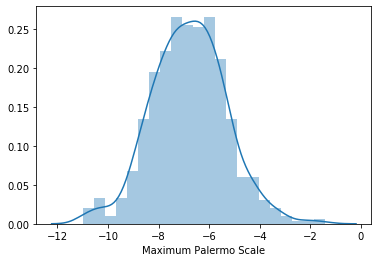

In [7]:
plt.figure()
sns.distplot(data['Maximum Palermo Scale'])
plt.show()

In [8]:
data.columns

Index(['Object Name', 'Period Start', 'Period End', 'Possible Impacts',
       'Cumulative Impact Probability', 'Asteroid Velocity',
       'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Cumulative Palermo Scale', 'Maximum Palermo Scale',
       'Maximum Torino Scale'],
      dtype='object')

In [9]:
X = data[['Asteroid Velocity','Asteroid Magnitude','Asteroid Diameter (km)','Cumulative Palermo Scale', 'Maximum Palermo Scale']]

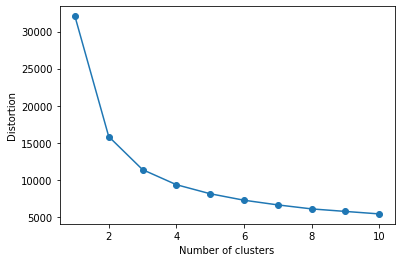

In [10]:
from sklearn.cluster import KMeans

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=150,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure()
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [11]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=150, 
    tol=1e-04, random_state=0)

In [12]:
y_km = km.fit_predict(X)

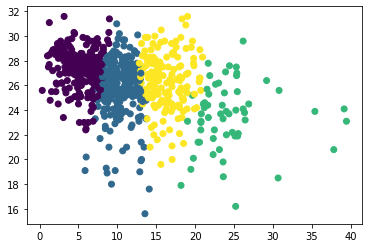

In [13]:
plt.figure()
plt.scatter(X['Asteroid Velocity'], X['Asteroid Magnitude'], c=y_km)
plt.show()